# Visualizing the Gender Gap in College Degrees

We aim to produce a diagram like the one below using matplotlib to usefully represent the gender gap across college degree majors, major categories and time. We will work by the principle of minimizing the 'non-data ink'.


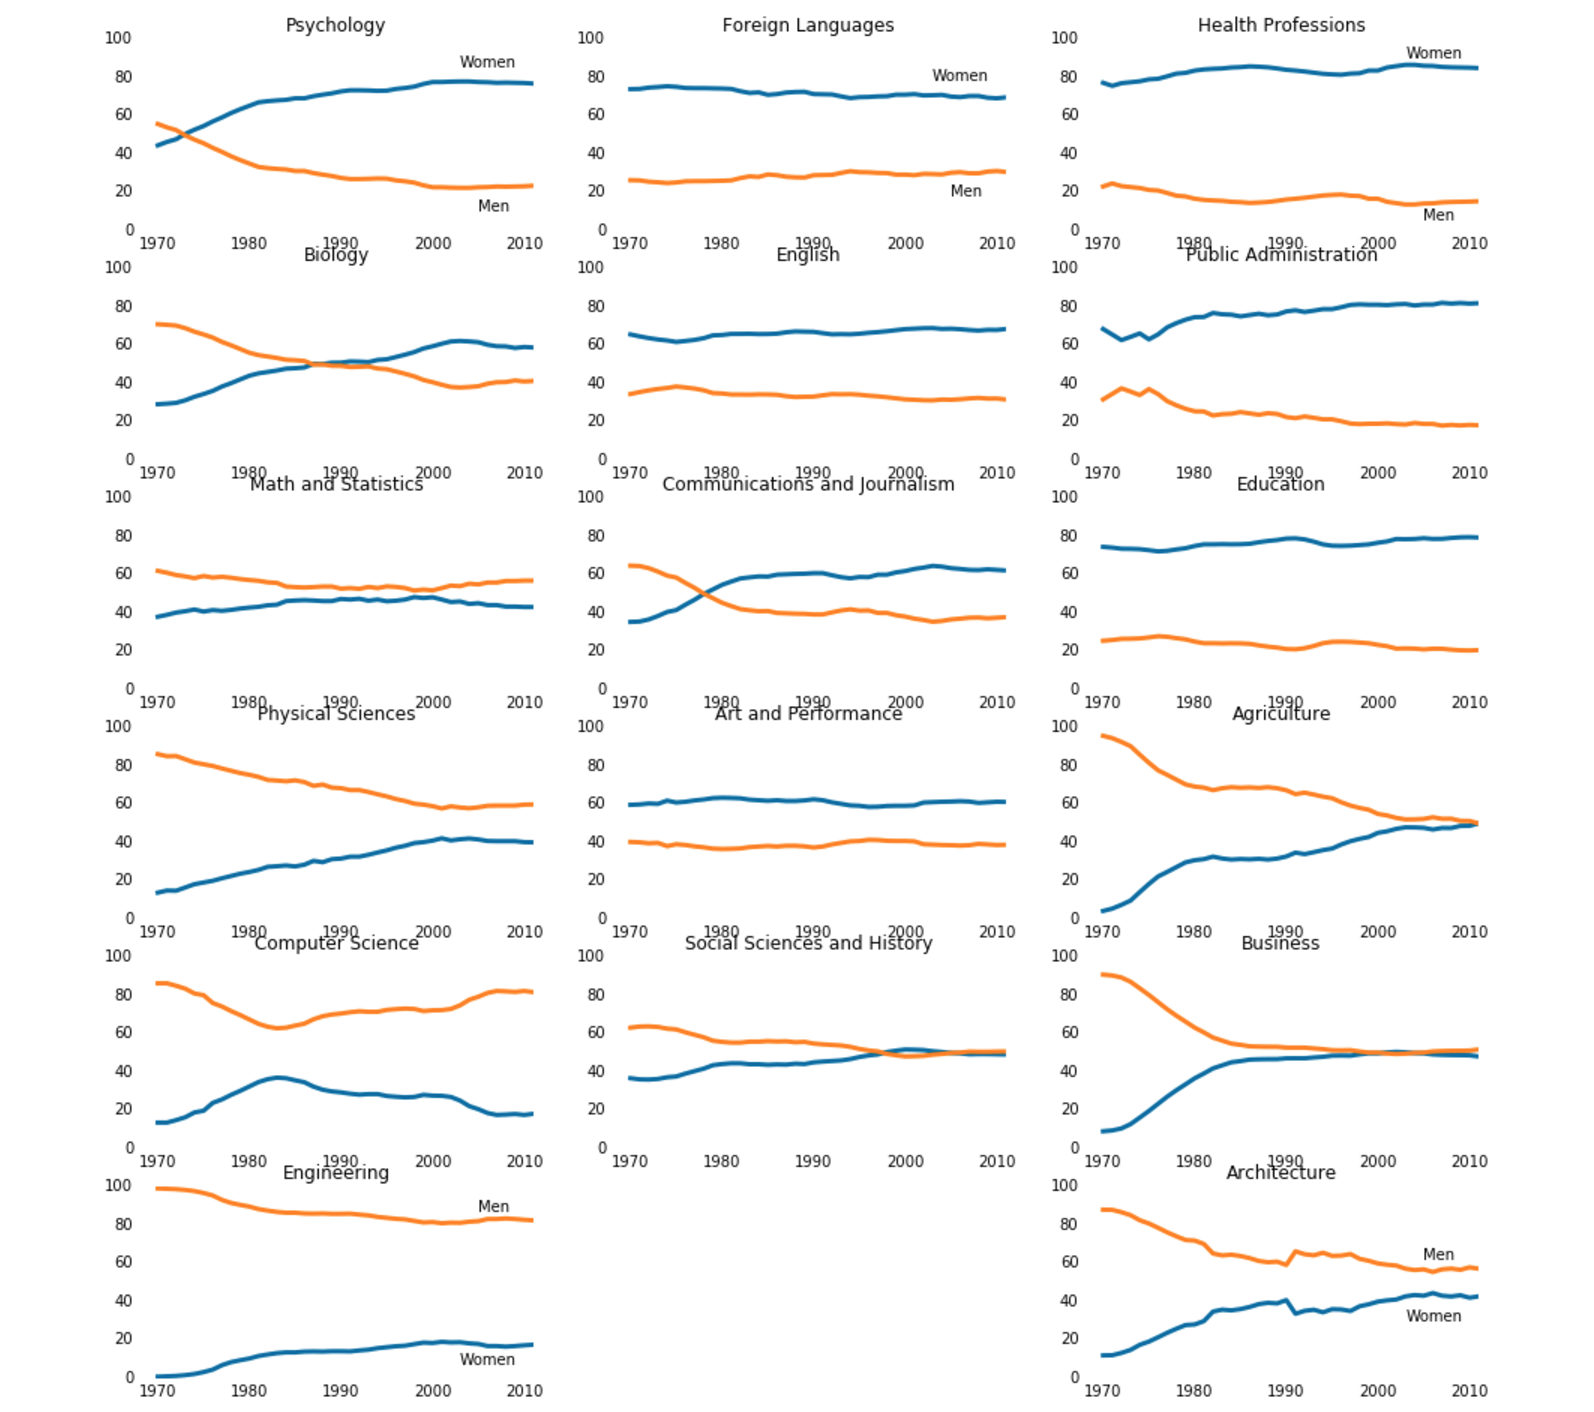

In [6]:
from IPython.display import Image
Image('/content/drive/My Drive/Coding study/Images/149_comparing_across_categories.png', width=600, height=600)

Below is the code used to generate and edit the presentation of the plots:

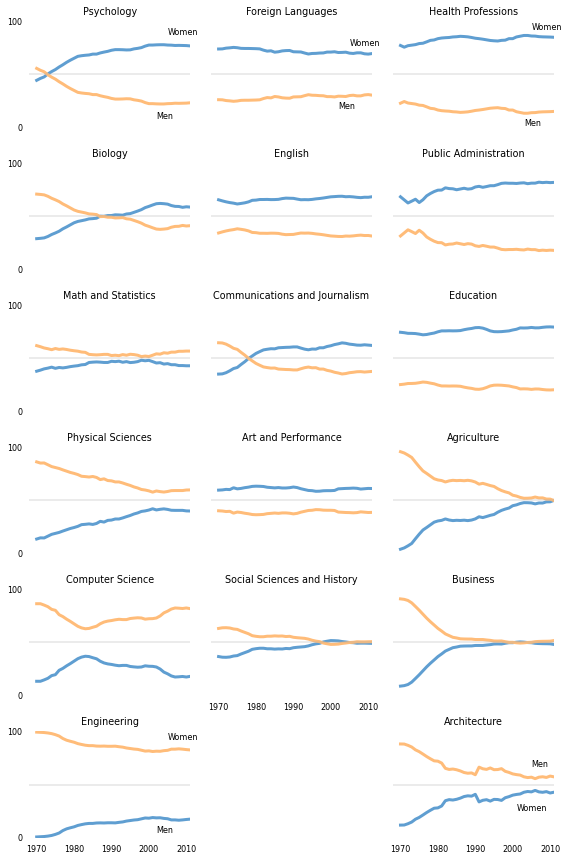

In [17]:
%matplotlib inline

# imports
import matplotlib.pyplot as plt
import pandas as pd

# read csv as pandas.dataframe
women_degrees = pd.read_csv('/content/drive/My Drive/Datasets/percent-bachelors-degrees-women-usa.csv')

# store rgb color tuples from 'color blind 10' palette
cb_10_blue = (95/255, 158/255, 209/255)
cb_10_gold = (1, 188/255, 121/255)
cb_10_gray = (171/255, 171/255, 171/255)

# store major categories
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

# instantiate figure object
fig = plt.figure(figsize=(8, 12))
plt.rcParams.update({'font.size': 8})

# loop over major categories of each category type separately and add subplots in 3 columns
c = 0
for cat_type in [stem_cats, lib_arts_cats, other_cats]:
  r = 0
  
  for cat in cat_type:
    num = 3*(r+1)-(2-c)
    ax = fig.add_subplot(6, 3, num)
    ax.plot(women_degrees['Year'], women_degrees[cat_type[r]], c=cb_10_blue, linewidth=3, label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[cat_type[r]], c=cb_10_gold, linewidth=3, label='Men')
    
    # remove spines
    for spine in ax.spines.values():
      spine.set_visible(False)

    # add title
    ax.set_title(cat_type[r])
    # turn off axes ticks and remove x axis and y axis labels for all plots 
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=False, labelleft=False)
    # set axes limits
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    # add a horizontal line (y=50) to all the subplots 
    ax.axhline(50, c=cb_10_gray, alpha=0.3)
    # add labels to first and last plot in first and last columns, to first plot only in middle column
    # turn on y axis labels for first column plots and display only 0 and 100 labels
    if c == 0:
      ax.tick_params(labelleft=True)
      ax.set_yticks([0, 100])
      if r == 0:
        ax.text(2005, 87, 'Women')
        ax.text(2002, 8, 'Men')
      elif r == len(cat_type) - 1:
        ax.text(2005, 92, 'Women')
        ax.text(2002, 5, 'Men')
    elif c == 1:
      if r == 0:
        ax.text(2005, 77, 'Women')
        ax.text(2002, 18, 'Men')
    elif c == 2:
      if r == 0:
        ax.text(2005, 92, 'Women')
        ax.text(2003, 2, 'Men')
      elif r == len(cat_type) - 1:
        ax.text(2005, 67, 'Men')
        ax.text(2001, 25, 'Women')
    
    # turn on x axis labels for last row plots
    if r == len(cat_type) - 1:
      ax.tick_params(labelbottom=True)

    r += 1
   
  c += 1

# add height padding between subplots so titles are readable
fig.tight_layout(h_pad=2)
# save figure to file
plt.savefig('/content/drive/My Drive/Coding study/Images/women_degrees.png')
# show figure
plt.show()




Removing the x-axis labels for all but the bottommost plots means the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how that has changed over time.

While removing most of the y-axis labels definitely reduced clutter, it also made it hard to understand which degrees have close to 50-50 gender breakdown. While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

